In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
URL= ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df= pd.read_csv(URL)

In [117]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


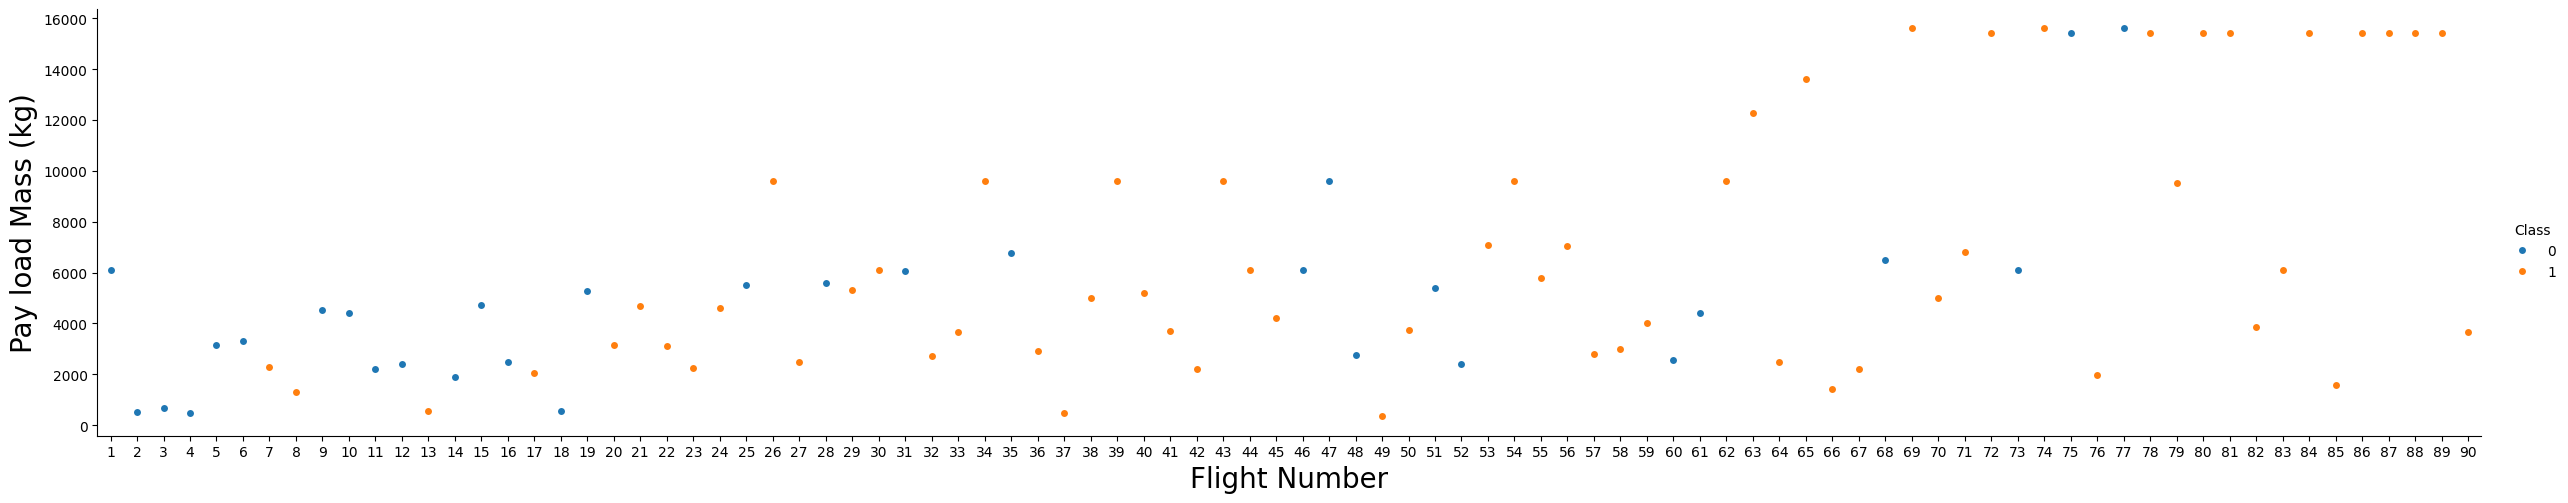

In [118]:
sns.catplot(y='PayloadMass', x= 'FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay load Mass (kg)', fontsize=20)
plt.show()

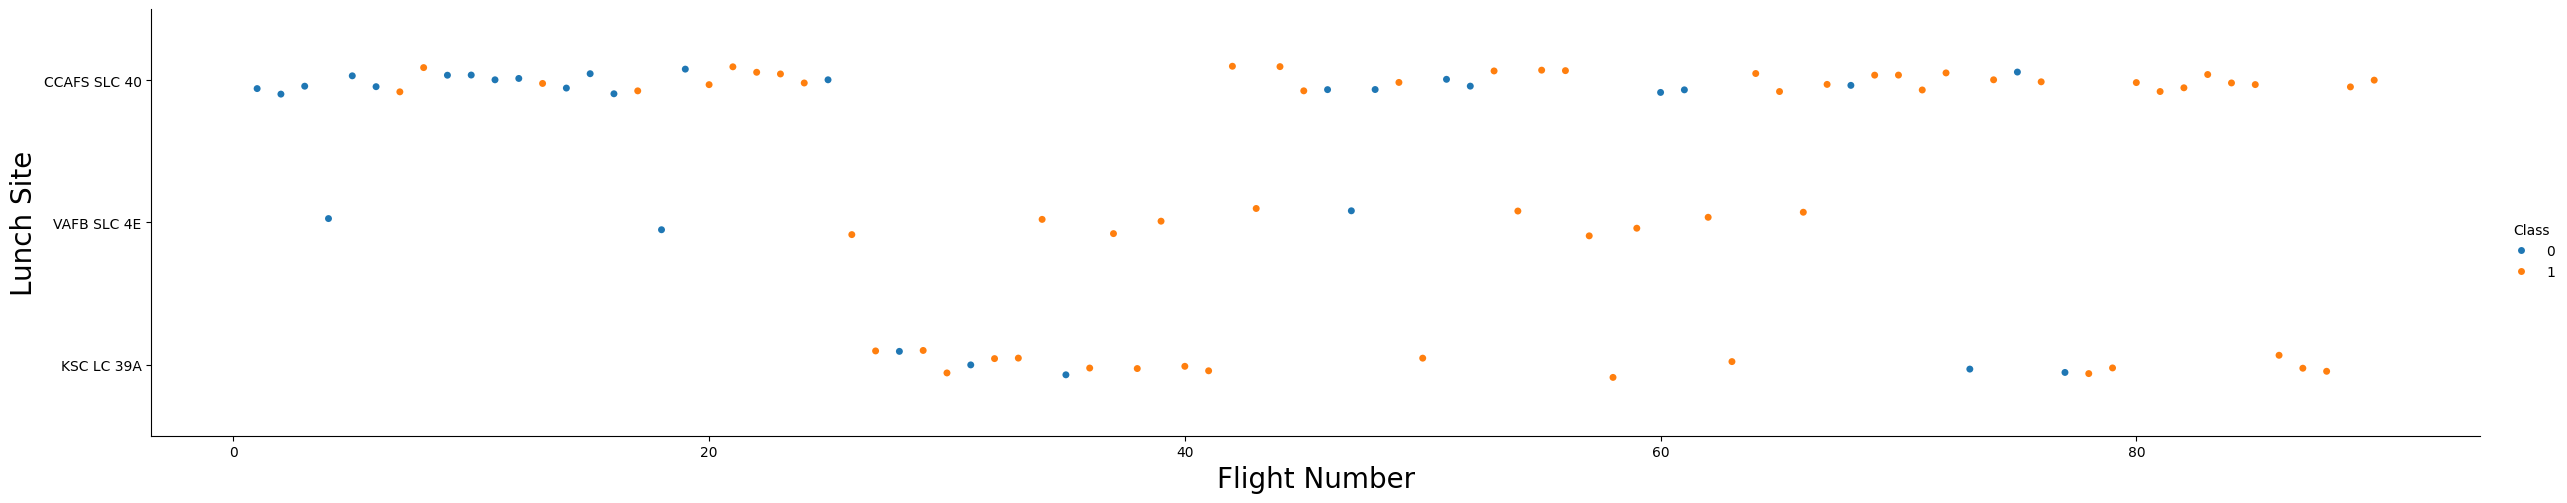

In [119]:
sns.catplot(y='LaunchSite', x='FlightNumber' , hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Lunch Site', fontsize=20)
plt.show()

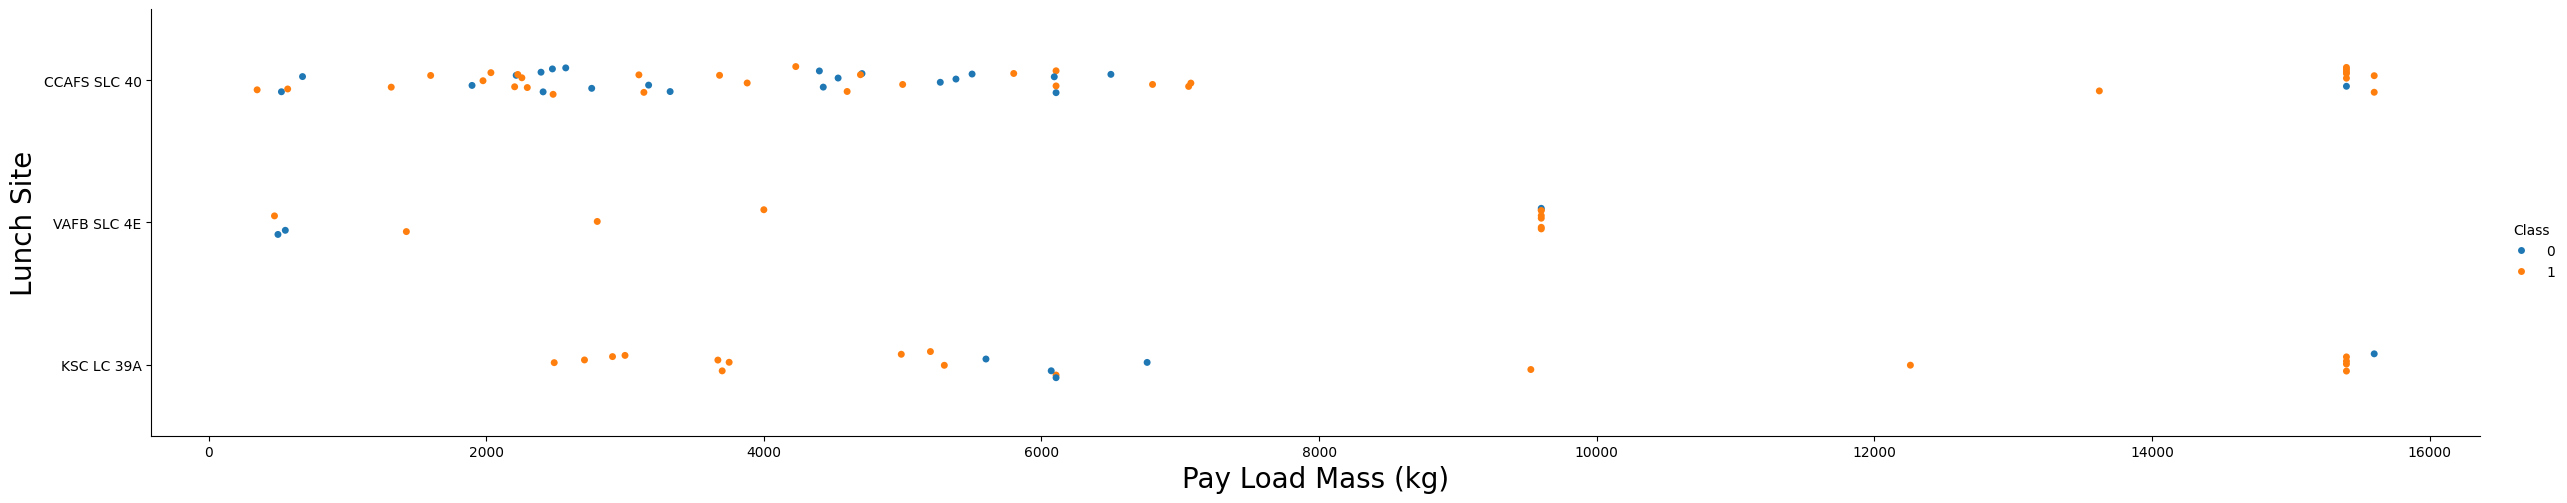

In [120]:
sns.catplot(y='LaunchSite', x='PayloadMass' , hue='Class', data=df, aspect=5)
plt.xlabel('Pay Load Mass (kg)', fontsize=20)
plt.ylabel('Lunch Site', fontsize=20)
plt.show()

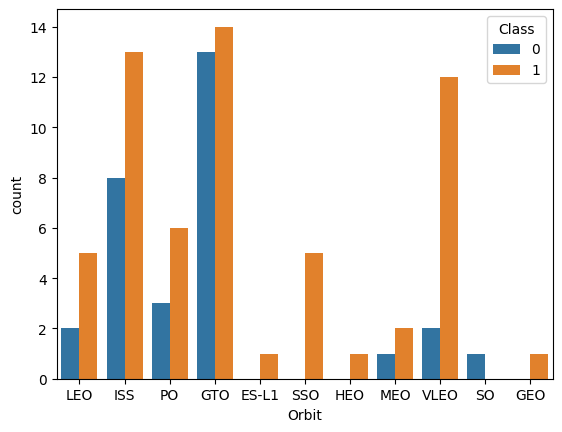

In [121]:
sns.countplot(data=df,x='Orbit',hue='Class')
plt.show()

In [122]:
grouped_df = df.groupby('Orbit')['Class'].mean()
grouped_df

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

In [123]:
df_orbit_class= df[['Orbit','Class']]
df_orbit_class.value_counts()

Orbit  Class
GTO    1        14
       0        13
ISS    1        13
VLEO   1        12
ISS    0         8
PO     1         6
SSO    1         5
LEO    1         5
PO     0         3
MEO    1         2
LEO    0         2
VLEO   0         2
GEO    1         1
MEO    0         1
SO     0         1
HEO    1         1
ES-L1  1         1
dtype: int64

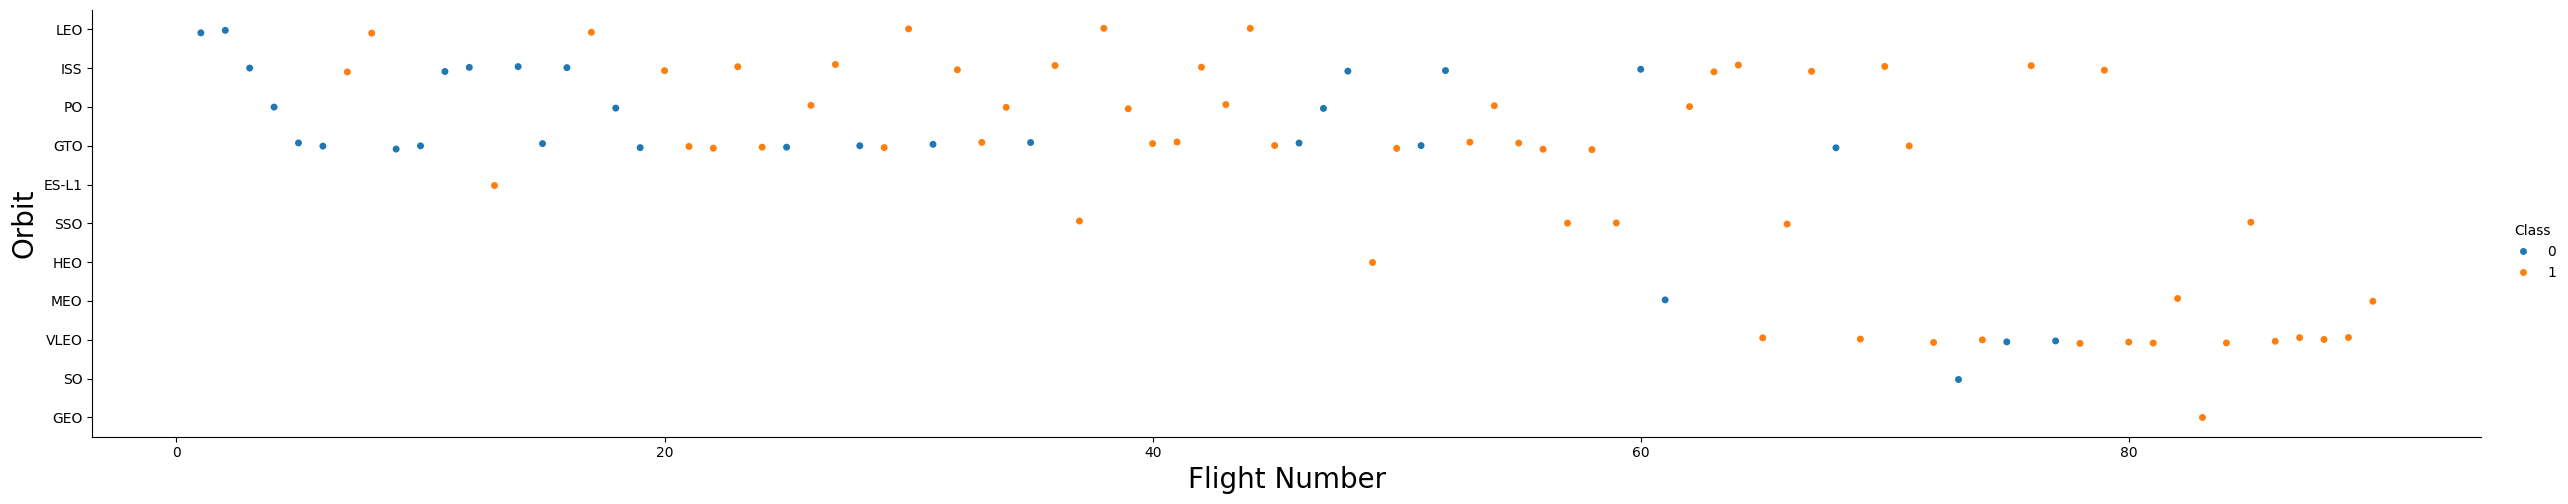

In [124]:
sns.catplot(y='Orbit',x='FlightNumber' , hue='Class', data= df, aspect=5 )
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

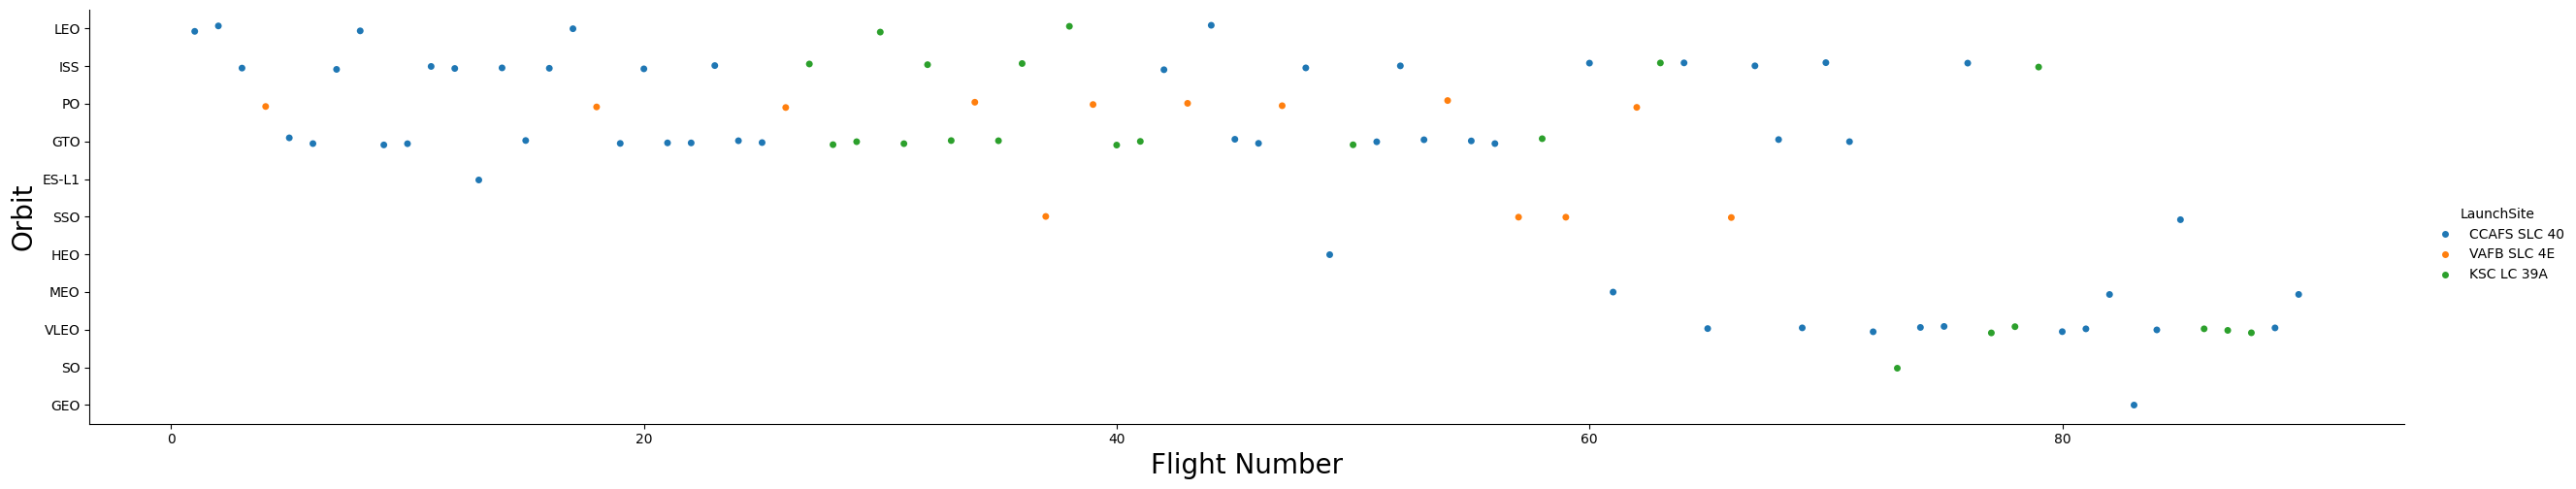

In [125]:
sns.catplot(y='Orbit',x='FlightNumber' , hue='LaunchSite', data= df, aspect=5 )
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

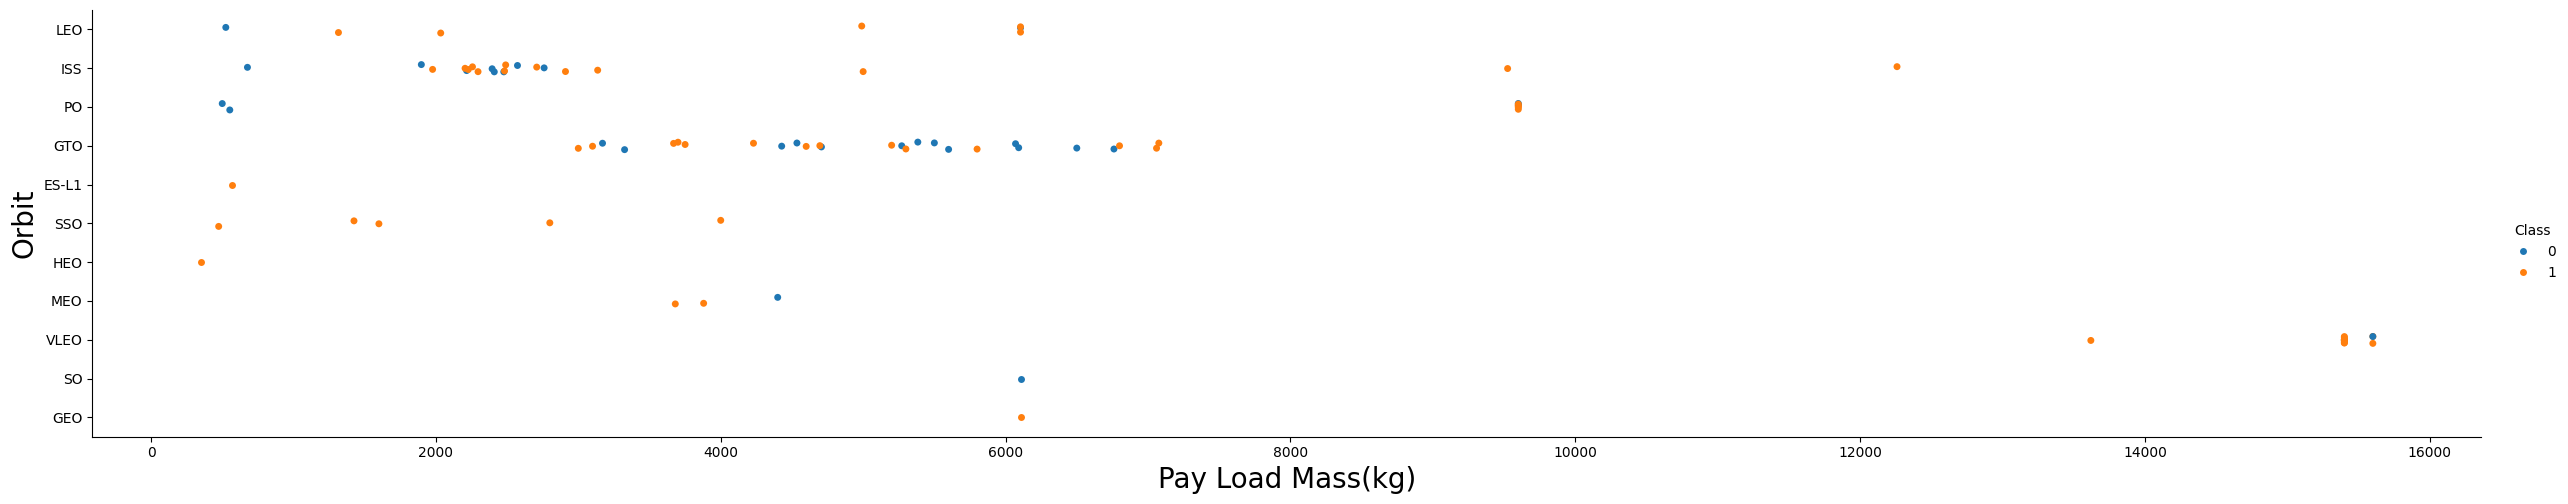

In [126]:
sns.catplot(y='Orbit',x='PayloadMass' , hue='Class', data= df, aspect=5 )
plt.xlabel('Pay Load Mass(kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.show()

In [127]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date']=year
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


In [128]:
df_success=df[df['Class']==1]

In [129]:
df_line= df_success[['Date','Class']]
df_line.head(3)

,Date,Class
6,2014,1
7,2014,1
12,2015,1


In [130]:
df_line['Date'].value_counts()

2020    16
2017    15
2018    11
2019     9
2016     5
2014     2
2015     2
Name: Date, dtype: int64

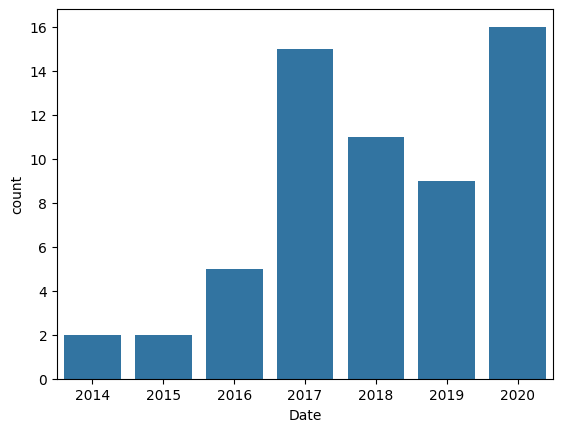

In [131]:
sns.countplot(x='Date', data=df_success)

plt.show()

In [132]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [133]:
features_one_hot=pd.get_dummies(df[['Orbit','LaunchSite','LandingPad', 'Serial']])
features_one_hot.head(3)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Orbit_ES-L1                          90 non-null     uint8
 1   Orbit_GEO                            90 non-null     uint8
 2   Orbit_GTO                            90 non-null     uint8
 3   Orbit_HEO                            90 non-null     uint8
 4   Orbit_ISS                            90 non-null     uint8
 5   Orbit_LEO                            90 non-null     uint8
 6   Orbit_MEO                            90 non-null     uint8
 7   Orbit_PO                             90 non-null     uint8
 8   Orbit_SO                             90 non-null     uint8
 9   Orbit_SSO                            90 non-null     uint8
 10  Orbit_VLEO                           90 non-null     uint8
 11  LaunchSite_CCAFS SLC 40              90 non-null     uint8
 

In [135]:
df_Dummy= features_one_hot.astype(float)
df_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Orbit_ES-L1                          90 non-null     float64
 1   Orbit_GEO                            90 non-null     float64
 2   Orbit_GTO                            90 non-null     float64
 3   Orbit_HEO                            90 non-null     float64
 4   Orbit_ISS                            90 non-null     float64
 5   Orbit_LEO                            90 non-null     float64
 6   Orbit_MEO                            90 non-null     float64
 7   Orbit_PO                             90 non-null     float64
 8   Orbit_SO                             90 non-null     float64
 9   Orbit_SSO                            90 non-null     float64
 10  Orbit_VLEO                           90 non-null     float64
 11  LaunchSite_CCAFS SLC 40           

In [136]:
df=df.drop(['Orbit','LaunchSite','LandingPad', 'Serial'], axis=1)
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,0,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,None None,1,False,False,False,1.0,0,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020,Falcon 9,15400.000000,True ASDS,2,True,True,True,5.0,2,-80.603956,28.608058,1
86,87,2020,Falcon 9,15400.000000,True ASDS,3,True,True,True,5.0,2,-80.603956,28.608058,1
87,88,2020,Falcon 9,15400.000000,True ASDS,6,True,True,True,5.0,5,-80.603956,28.608058,1
88,89,2020,Falcon 9,15400.000000,True ASDS,3,True,True,True,5.0,2,-80.577366,28.561857,1


In [138]:
df=pd.concat([df, df_Dummy], axis=1)
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2012,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2013,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2013,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2013,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020,Falcon 9,15400.000000,True ASDS,2,True,True,True,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87,2020,Falcon 9,15400.000000,True ASDS,3,True,True,True,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88,2020,Falcon 9,15400.000000,True ASDS,6,True,True,True,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89,2020,Falcon 9,15400.000000,True ASDS,3,True,True,True,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [139]:
df.to_csv('week02-02.csv',index=False)